<a href="https://colab.research.google.com/github/sujit-kumar-singh-9115/-Rossmann-Sales-Prediction---Capstone-Project/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error 
import math


# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_RossmannData = pd.read_csv('/content/drive/MyDrive/Alma-Better Folder/Module 4/CapstoneProject ( Supervised ML - Regression)/Copy of Rossmann Stores Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

Promo - indicates whether a store is running a promo on that day

In [7]:
df_RossmannData.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
df_storeData = pd.read_csv('/content/drive/MyDrive/Alma-Better Folder/Module 4/CapstoneProject ( Supervised ML - Regression)/Copy of store.csv')

In [6]:
df_storeData.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
# analysing the shape of both dataset
print(df_RossmannData.shape)
print(df_storeData.shape)

(1017209, 9)
(1115, 10)


In [8]:
# looking for nan values
print(df_RossmannData.isnull().sum())


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [9]:
print(df_storeData.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


#DATA PREPROCESSING
### AS we can see that RossmannData contain no nan values.

### But in storedata there are lot of nan values.So i did so preprocessing of the data 



In [10]:
df_storeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Out of 1115 entries there are missing values in the storedata set.
To decide what value to imput first we will try to plot and see the skweness and other inferences. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


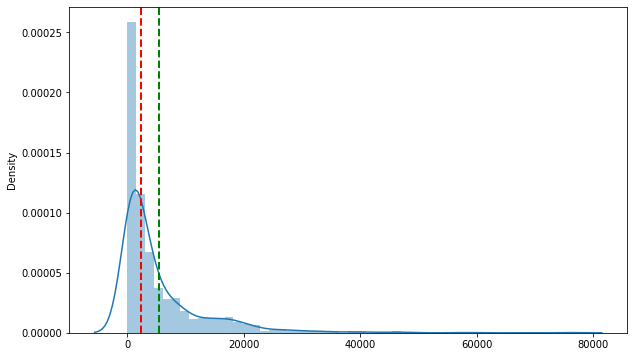

In [11]:
#distribution plot of competition distance
plt.figure(figsize=(10,6))
ax = sns.distplot(x = df_storeData['CompetitionDistance'])
ax.axvline(df_storeData['CompetitionDistance'].median(), color='red', linestyle='dashed', linewidth=2)
ax.axvline(df_storeData['CompetitionDistance'].mean(), color = 'green',linestyle = 'dashed', linewidth =2) 
plt.show()

For the distribution plot we see that CompetitionDistance is right skewed. Median is more robust to outlier effect, so we will replace the nan values with median

In [10]:
# filling competition distance with the median value
df_storeData['CompetitionDistance'].fillna(df_storeData['CompetitionDistance'].median(), inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


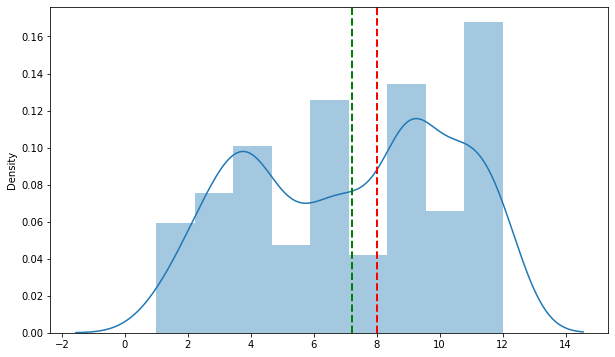

In [13]:
#distribution plot of CompetitionOpenSinceMonth
plt.figure(figsize = (10,6))
ax = sns.distplot(x = df_storeData['CompetitionOpenSinceMonth'])
ax.axvline(df_storeData['CompetitionOpenSinceMonth'].mean(), color='green', linestyle='dashed', linewidth=2)
ax.axvline(df_storeData['CompetitionOpenSinceMonth'].median(), color='red', linestyle='dashed', linewidth=2)   
plt.show()

CompetitionOpenSinceMonth is negatively skewed, but since it's like a categorical data we will replace the nan value with Mode. 

In [11]:
# filling CompetitionOpenSinceMonth with the mode value
df_storeData['CompetitionOpenSinceMonth'].fillna(df_storeData['CompetitionOpenSinceMonth'].mode()[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


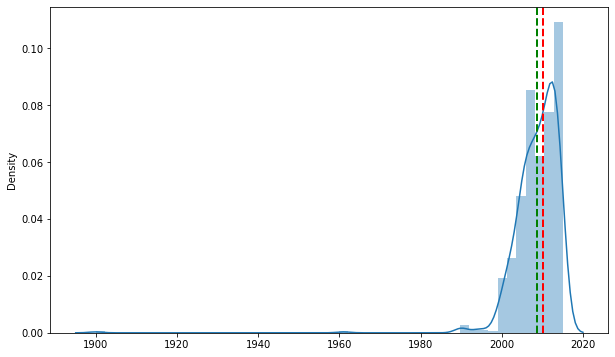

In [15]:
#distribution plot of CompetitionOpenSinceYear
plt.figure(figsize = (10,6))
ax = sns.distplot(x = df_storeData['CompetitionOpenSinceYear'] )
ax.axvline(df_storeData['CompetitionOpenSinceYear'].mean(), color = 'green', linestyle = 'dashed', linewidth = 2)
ax.axvline(df_storeData['CompetitionOpenSinceYear'].median(), color = 'red', linestyle = 'dashed', linewidth = 2)
plt.show()

CompetitionOpenSinceYear is negatively skewed, but since it's like a categorical data so we will replace the nan value with Mode.

In [12]:
# filling CompetitionOpenSinceYear with the mode value
df_storeData['CompetitionOpenSinceYear'].fillna(df_storeData['CompetitionOpenSinceYear'].mode()[0], inplace = True)

Since Promo2SinceWeek,Promo2SinceYear and PromoInterval  like a categorical data so we will replace the nan value with Mode.

In [13]:
df_storeData['Promo2SinceWeek'].fillna(df_storeData['Promo2SinceWeek'].mode()[0], inplace = True)
df_storeData['Promo2SinceYear'].fillna(df_storeData['Promo2SinceYear'].mode()[0], inplace = True)
df_storeData['PromoInterval'].fillna(df_storeData['PromoInterval'].mode()[0], inplace = True)

In [18]:
df_storeData.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

##Merge the Rossmann_df and Store_df csv by column 'Store' as in both csv Store column is common.

In [14]:
#merge the datasets on stores data
df_storeData = df_storeData.merge(df_RossmannData, on = 'Store', how = 'left')

In [15]:
df_storeData.duplicated().sum()

0

In [21]:
df_storeData.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6102,612,1,1,0,1


In [22]:
df_storeData.shape

(1017209, 18)

In [23]:
df_storeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  float64
 5   CompetitionOpenSinceYear   1017209 non-null  float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            1017209 non-null  float64
 8   Promo2SinceYear            1017209 non-null  float64
 9   PromoInterval              1017209 non-null  object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

If we observe the dataset, Date column is in object datatype so we need to change it to Datetime.

In [16]:
# importing datetime module
from datetime import datetime as dt

In [17]:
df_storeData['Date'] = pd.to_datetime(df_storeData['Date'], format = '%Y/%m/%d')

Changing different dtypes to int type.

In [18]:
df_storeData['CompetitionDistance']= df_storeData['CompetitionDistance'].astype(int)
df_storeData['CompetitionOpenSinceMonth']= df_storeData['CompetitionOpenSinceMonth'].astype(int)
df_storeData['CompetitionOpenSinceYear']= df_storeData['CompetitionOpenSinceYear'].astype(int)
df_storeData['Promo2SinceWeek']= df_storeData['Promo2SinceWeek'].astype(int)
df_storeData['Promo2SinceYear']= df_storeData['Promo2SinceYear'].astype(int)

In [27]:
df_storeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1017209 non-null  int64         
 4   CompetitionOpenSinceMonth  1017209 non-null  int64         
 5   CompetitionOpenSinceYear   1017209 non-null  int64         
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  int64         
 8   Promo2SinceYear            1017209 non-null  int64         
 9   PromoInterval              1017209 non-null  object        
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

#Exploratory Data Analysis
###Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it. It includes analyzing what our dataset consists of. Exploring continuous as well as categorical variables and their influence on our dependent variable-'Sales'.

###Just by observing the head of the dataset and understanding the features involved in it, the following hypotheses could be framed:

*   There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.
*  Customers would have a positive correlation with Sales.
*   The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.
*   Promotion should be having a positive correlation with Sales.

*   Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.
*   Stores are influenced by seasonality, probably before holidays sales would be high.
##Next step is to explore and see in a data driven way about the factors influencing Rossmann stores sales and how.







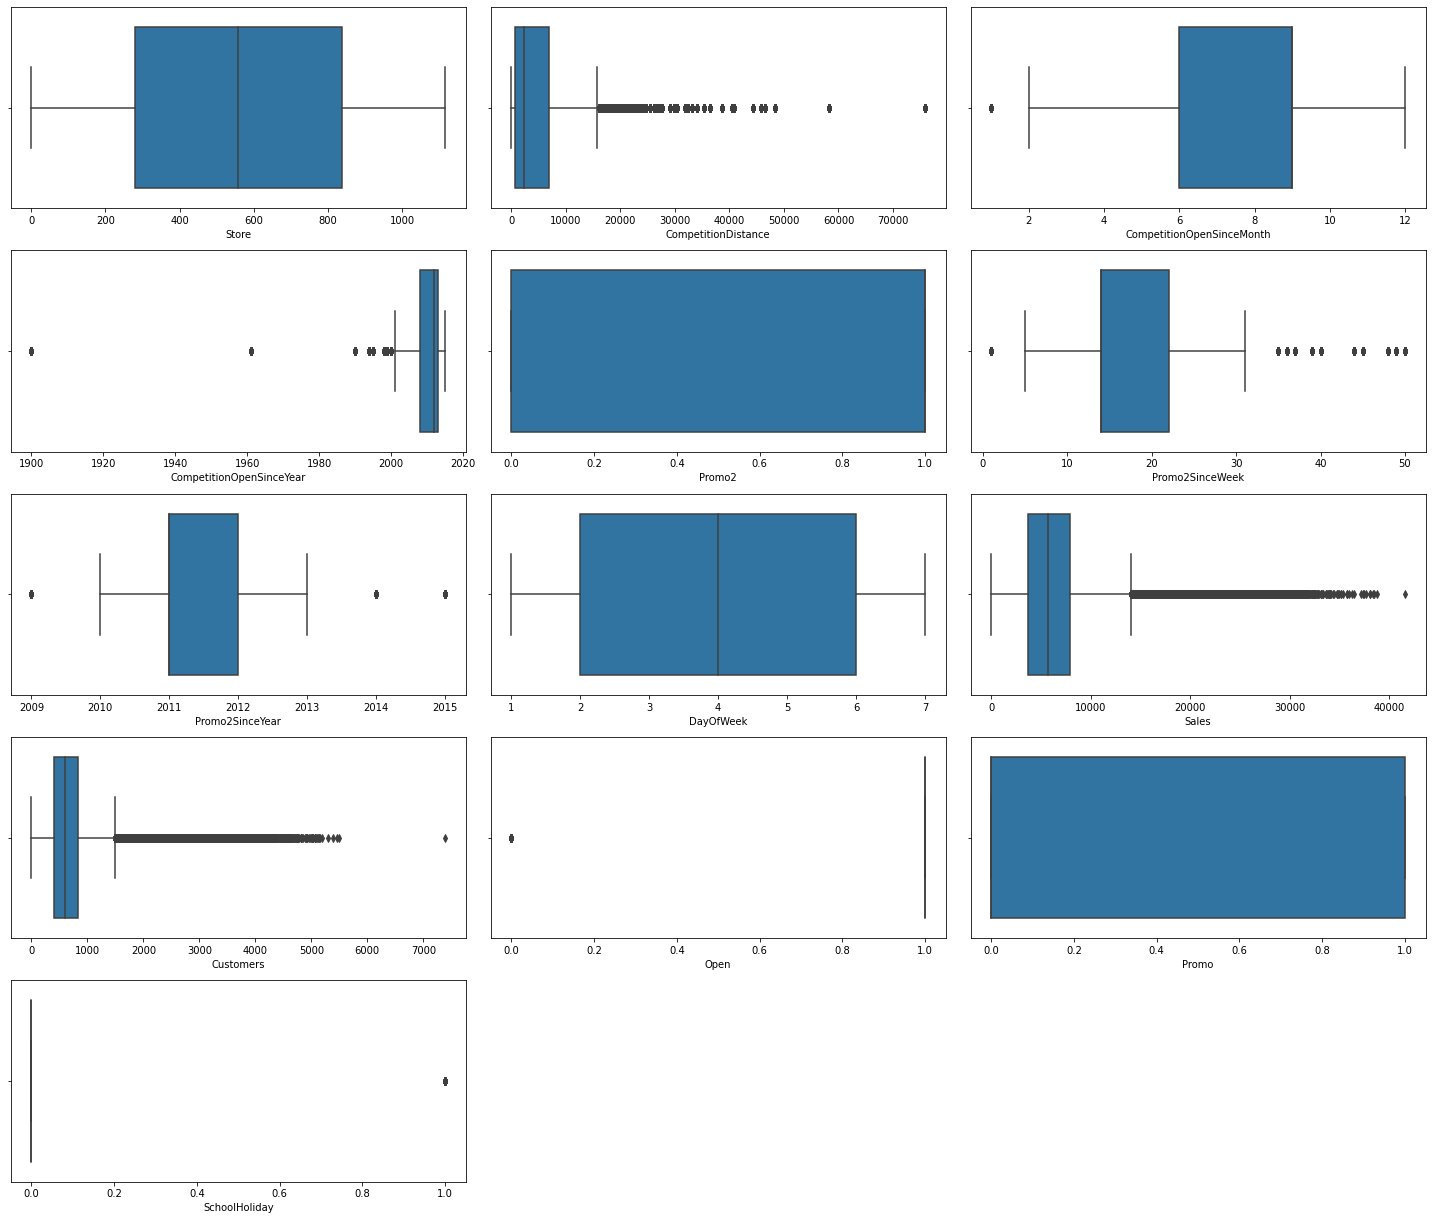

In [ ]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

plt.figure(figsize = (20, 20))
num = 1
for col in df_storeData.describe().columns:
    plt.subplot(6,3,num)
    sns.boxplot(df_storeData[col])
    num+=1

plt.tight_layout()   

In [28]:
df_storeData.describe().columns

numerical_features1 = ['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday']

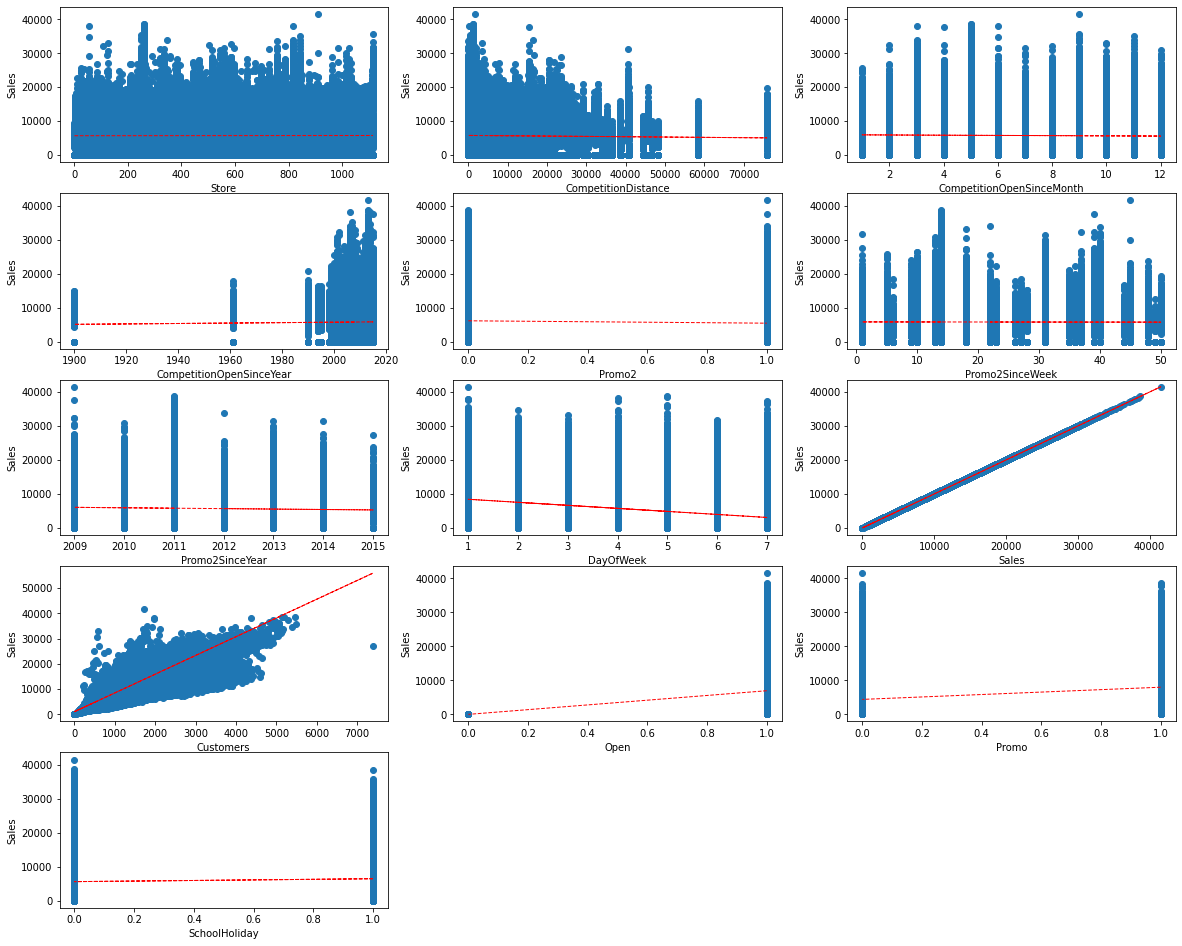

In [30]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

plt.figure(figsize = (20, 20))
num = 1
for col in df_storeData.describe().columns:
    plt.subplot(6,3,num)
    feature = df_storeData[col]
    label = df_storeData['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_storeData[col], df_storeData['Sales'], 1)
    y_hat = np.poly1d(z)(df_storeData[col])

    plt.plot(df_storeData[col], y_hat, "r--", lw=1)
    num+=1

plt.show()   

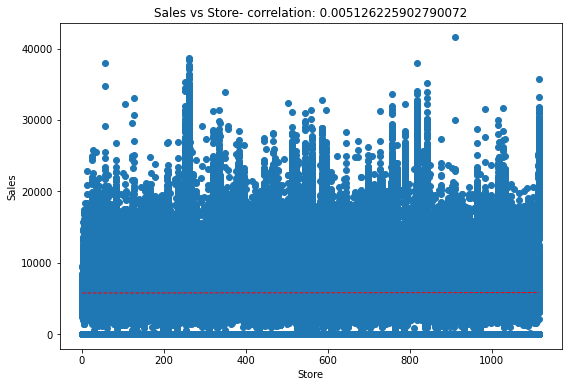

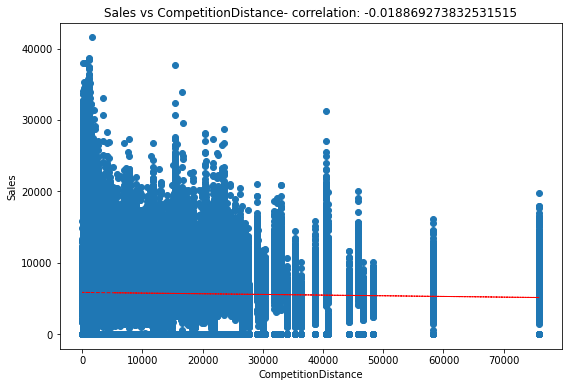

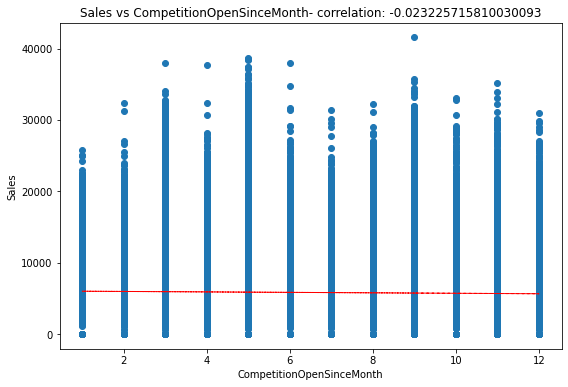

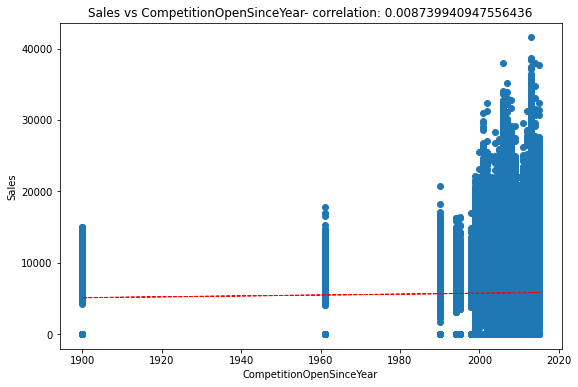

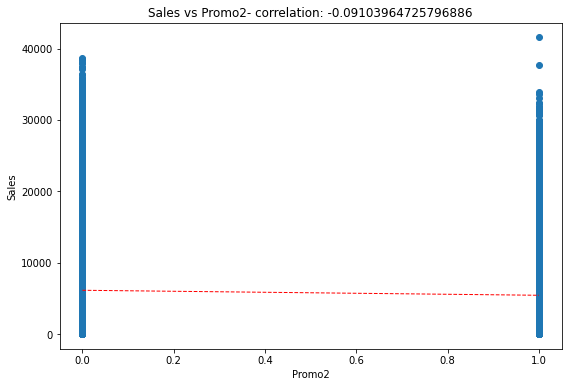

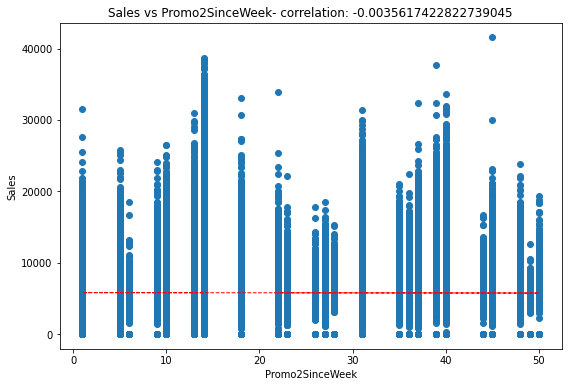

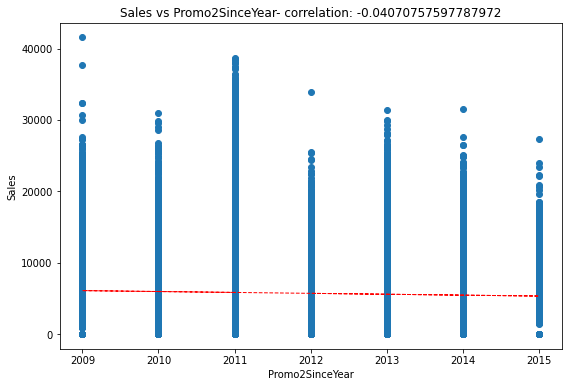

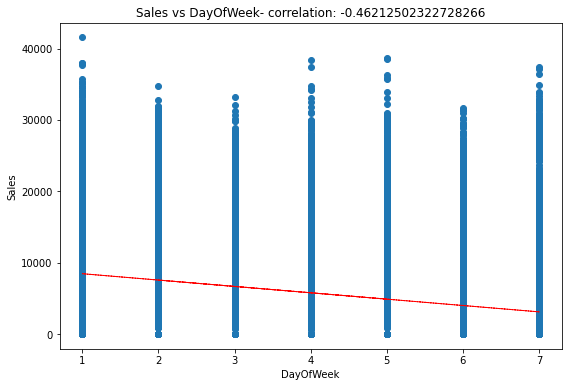

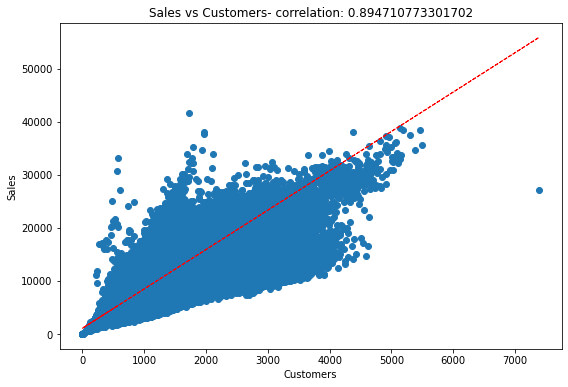

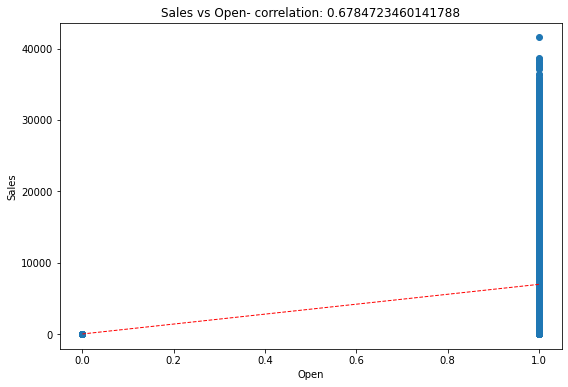

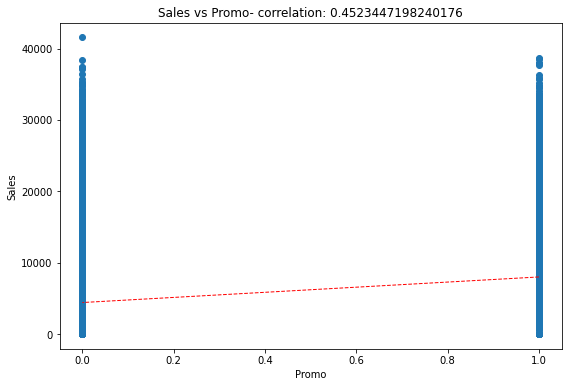

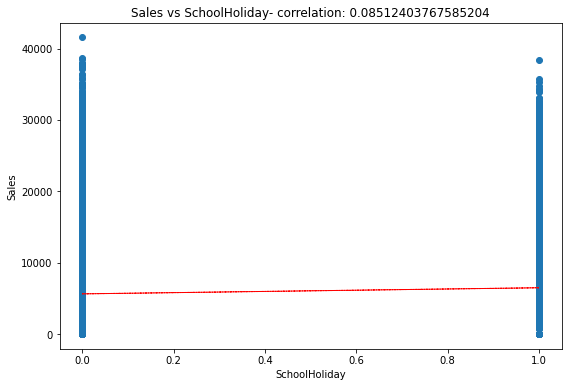

In [ ]:
for col in numerical_features1[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_storeData[col]
    label = df_storeData['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_storeData[col], df_storeData['Sales'], 1)
    y_hat = np.poly1d(z)(df_storeData[col])

    plt.plot(df_storeData[col], y_hat, "r--", lw=1)

plt.show()

In [19]:
# Getting the unique values in State Holiday
df_storeData['StateHoliday'].unique()
# Replacing the "0"(string) with 0
df_storeData['StateHoliday'].replace({0:'0'},inplace=True)
# Checking 
df_storeData['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

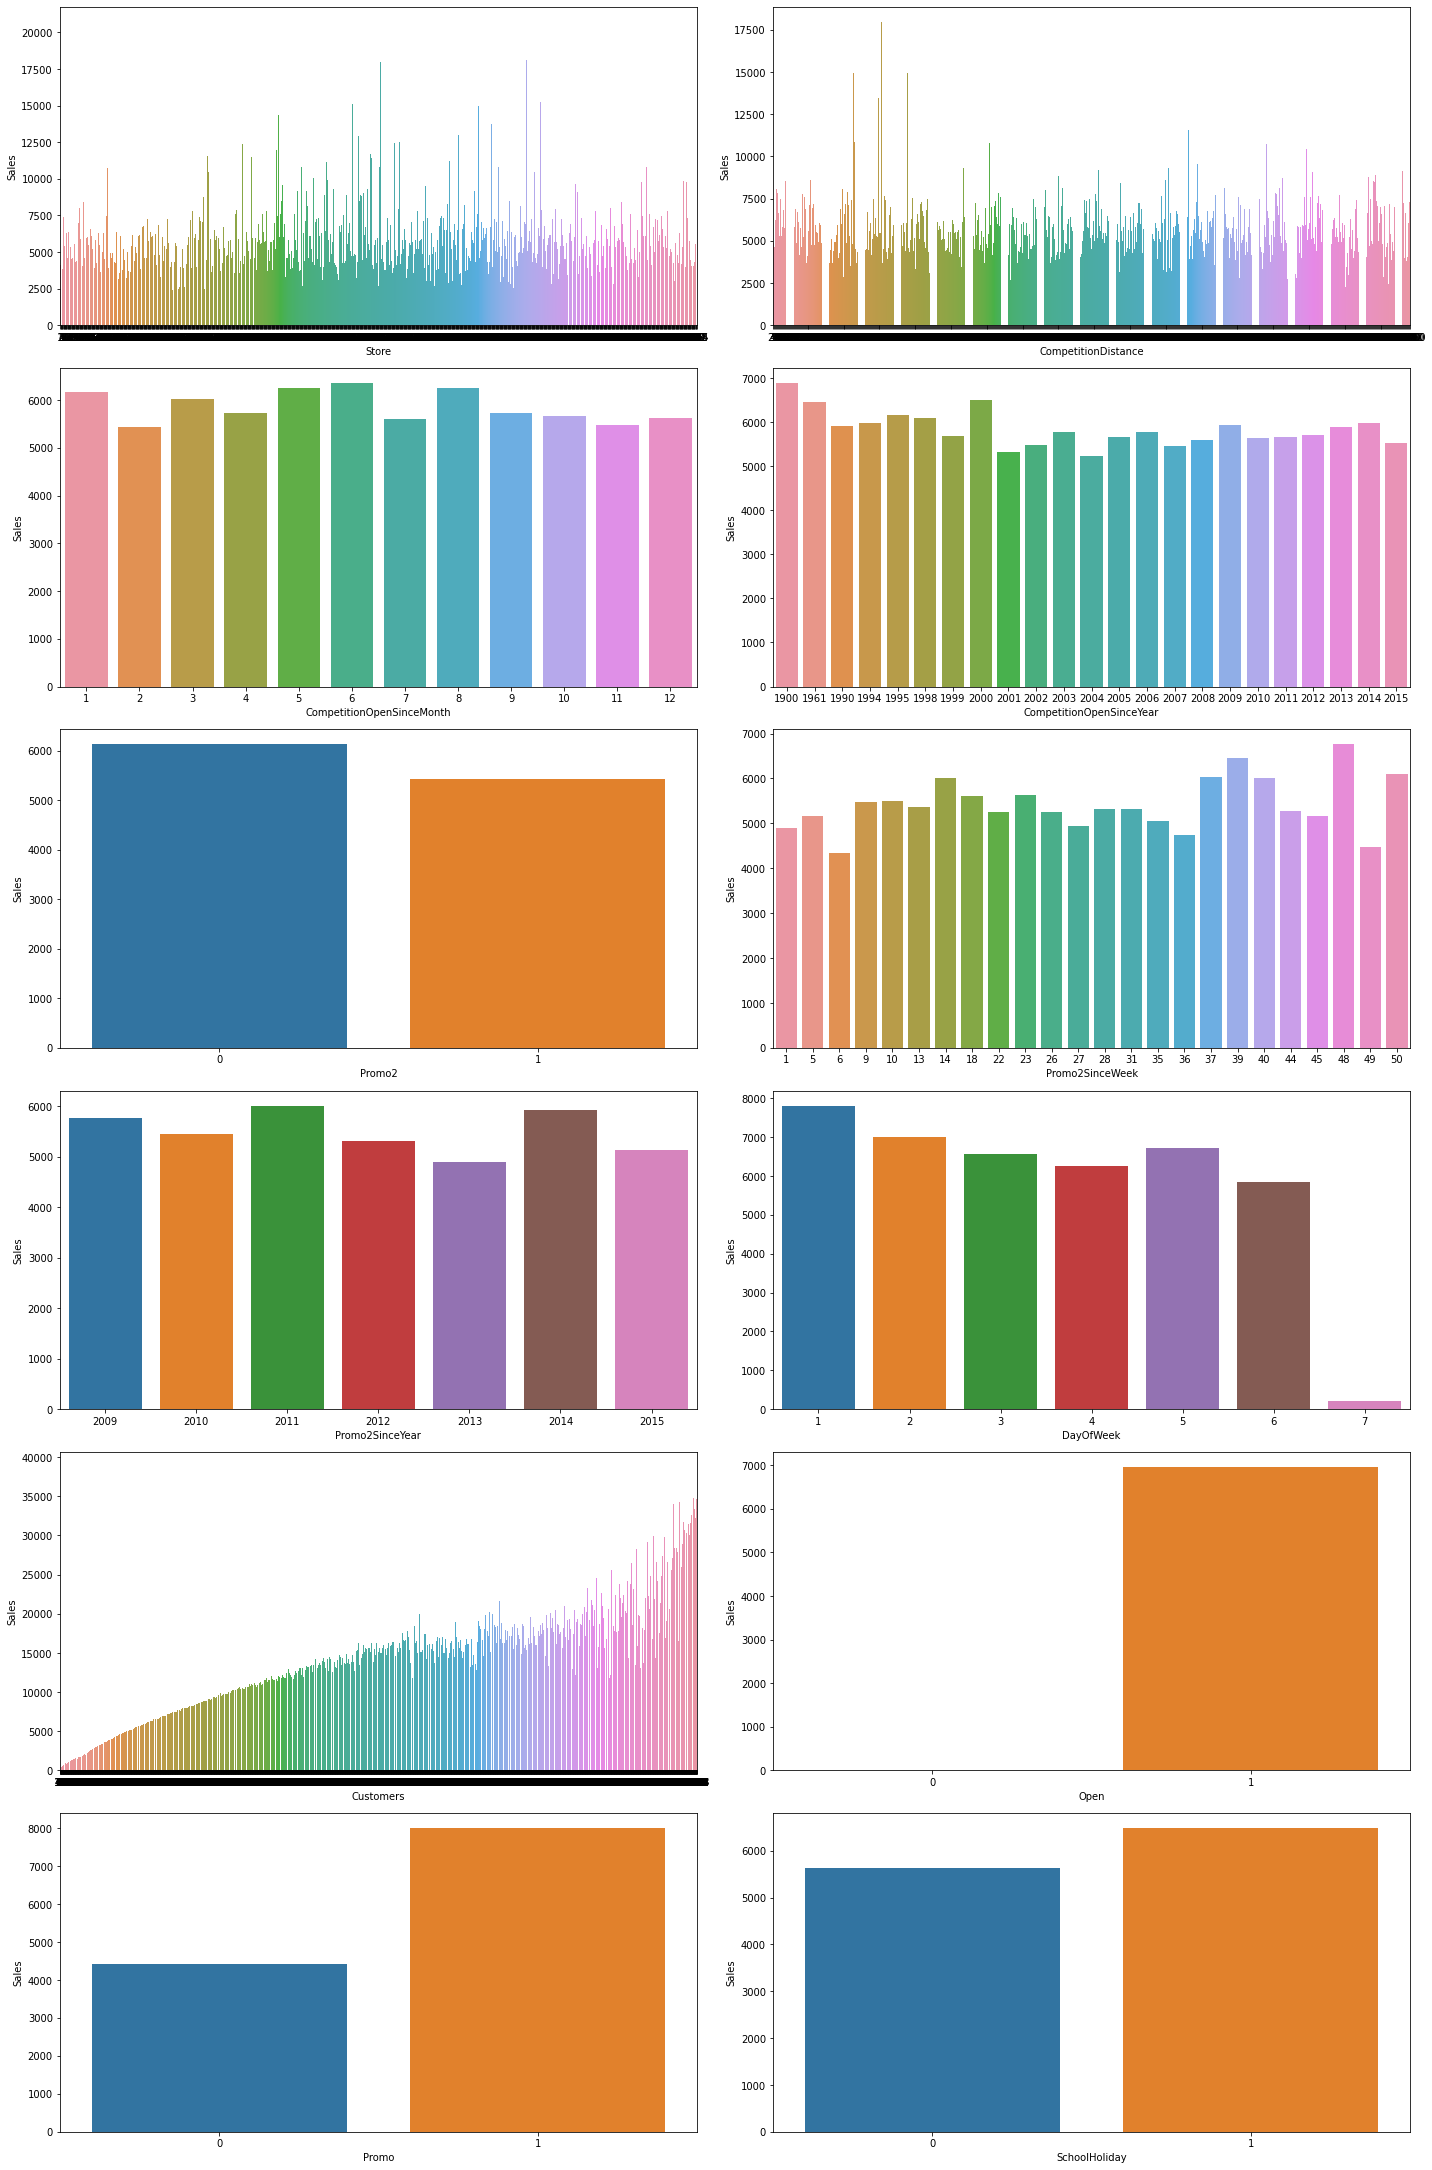

In [ ]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

plt.figure(figsize = (20, 80))
num = 1
for col in numerical_features1:
    plt.subplot(16,2,num)
    y_label = df_storeData['Sales']
    x_label = df_storeData[col]
    sns.barplot(x =x_label,y= y_label, data =df_storeData, ci = False )
    num+=1

plt.tight_layout()   

<function matplotlib.pyplot.show(*args, **kw)>

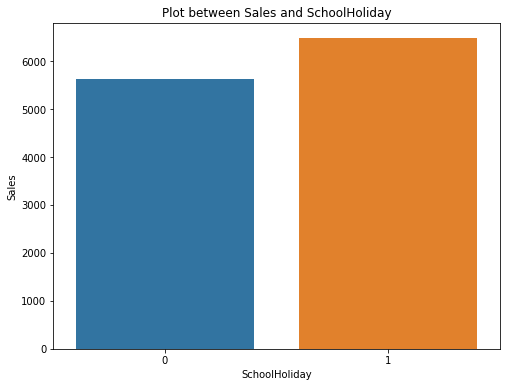

In [ ]:
plt.figure(figsize = (8,6))
y_label = df_storeData['Sales']
x_label = df_storeData['SchoolHoliday']
sns.barplot(x =x_label,y= y_label, data =df_storeData, ci = False )
plt.title('Plot between Sales and SchoolHoliday')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

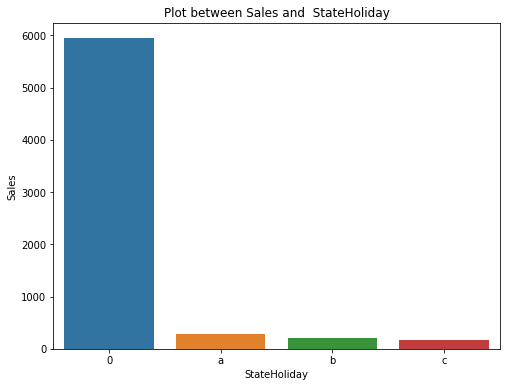

In [ ]:
plt.figure(figsize = (8,6))
y_label = df_storeData['Sales']
x_label = df_storeData['StateHoliday']
sns.barplot(x =x_label,y= y_label, data =df_storeData, ci = False )
plt.title('Plot between Sales and  StateHoliday')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

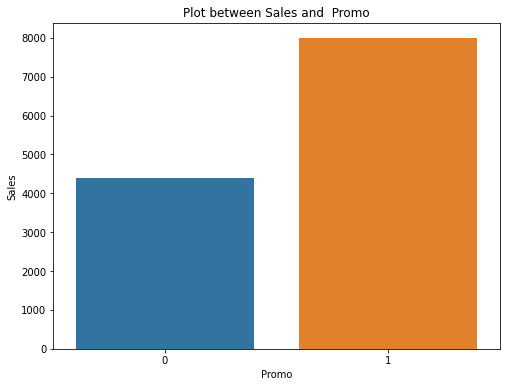

In [ ]:
plt.figure(figsize = (8,6))
y_label = df_storeData['Sales']
x_label = df_storeData['Promo']
sns.barplot(x =x_label,y= y_label, data =df_storeData, ci = False )
plt.title('Plot between Sales and  Promo')
plt.show

#Observation


*   There were more sales on Monday, probably because shops generally remain closed on Sundays.

*  It could be seen that the Promo leads to more sales.

*   Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.


*   On an average Store type B had the highest sales.


*   Highest average sales were seen with Assortment levels-b which is 'extra'.

*   With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.






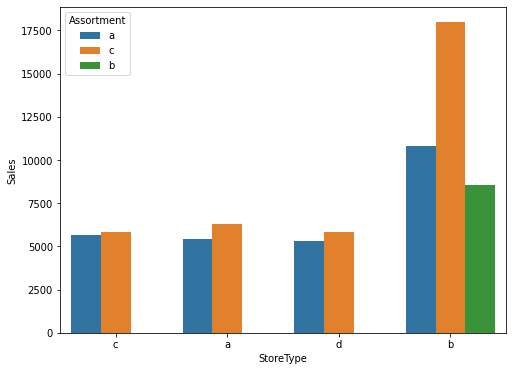

In [ ]:
#Let's check the relationship between store type, assortment levels and sales
plt.figure(figsize=(8,6))
sns.barplot(x = df_storeData['StoreType'], y = df_storeData['Sales'], hue = df_storeData['Assortment'],ci = False)
plt.show()

##Observation:
The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

In [ ]:
#Store Type and Sales Exploration
store_type = df_storeData.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


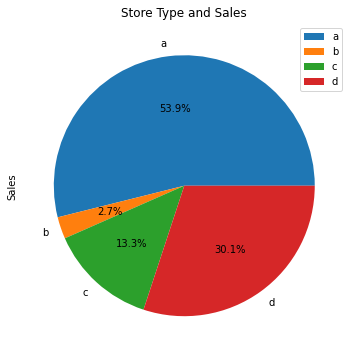

In [ ]:
#let's explore store type a bit and it's influence on sales
plt.figure(figsize=(8,6))
df_storeData.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales',legend = True,  autopct='%1.1f%%')
plt.show()

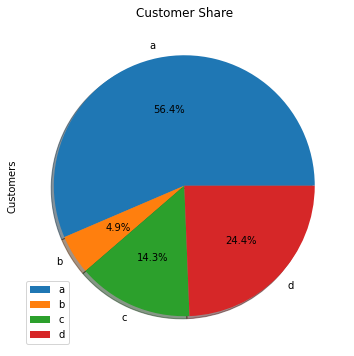

In [ ]:
#customers and store type
plt.figure(figsize=(8,6))
df_storeData.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

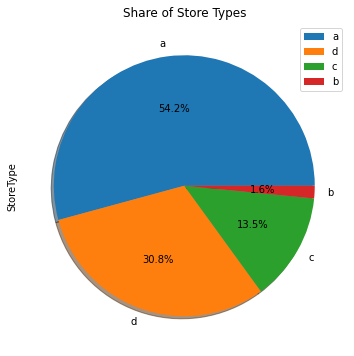

In [ ]:
#store types in all of the dataset
plt.figure(figsize=(8,6))
df_storeData["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

#Observation:


*   A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.

*   Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.




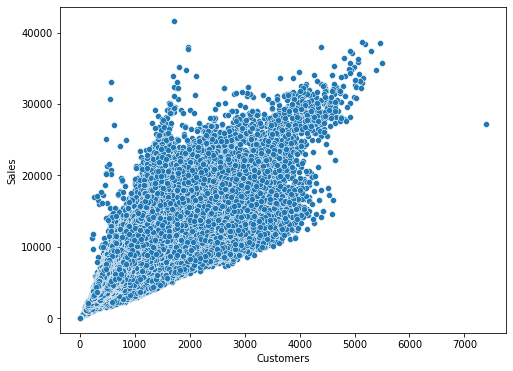

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Customers",y="Sales",data=df_storeData)
plt.show()

Observation:
Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

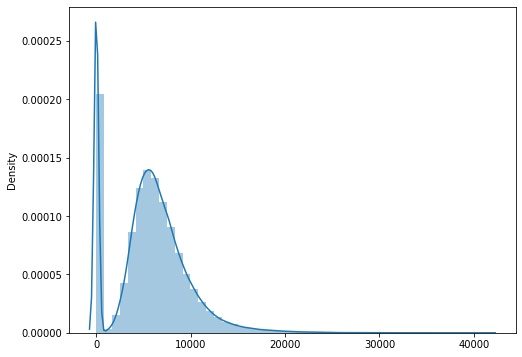

In [ ]:
#distribution plot of Sales, as expected positively skewed
plt.figure(figsize=(8,6))
sns.distplot(x=df_storeData['Sales'])

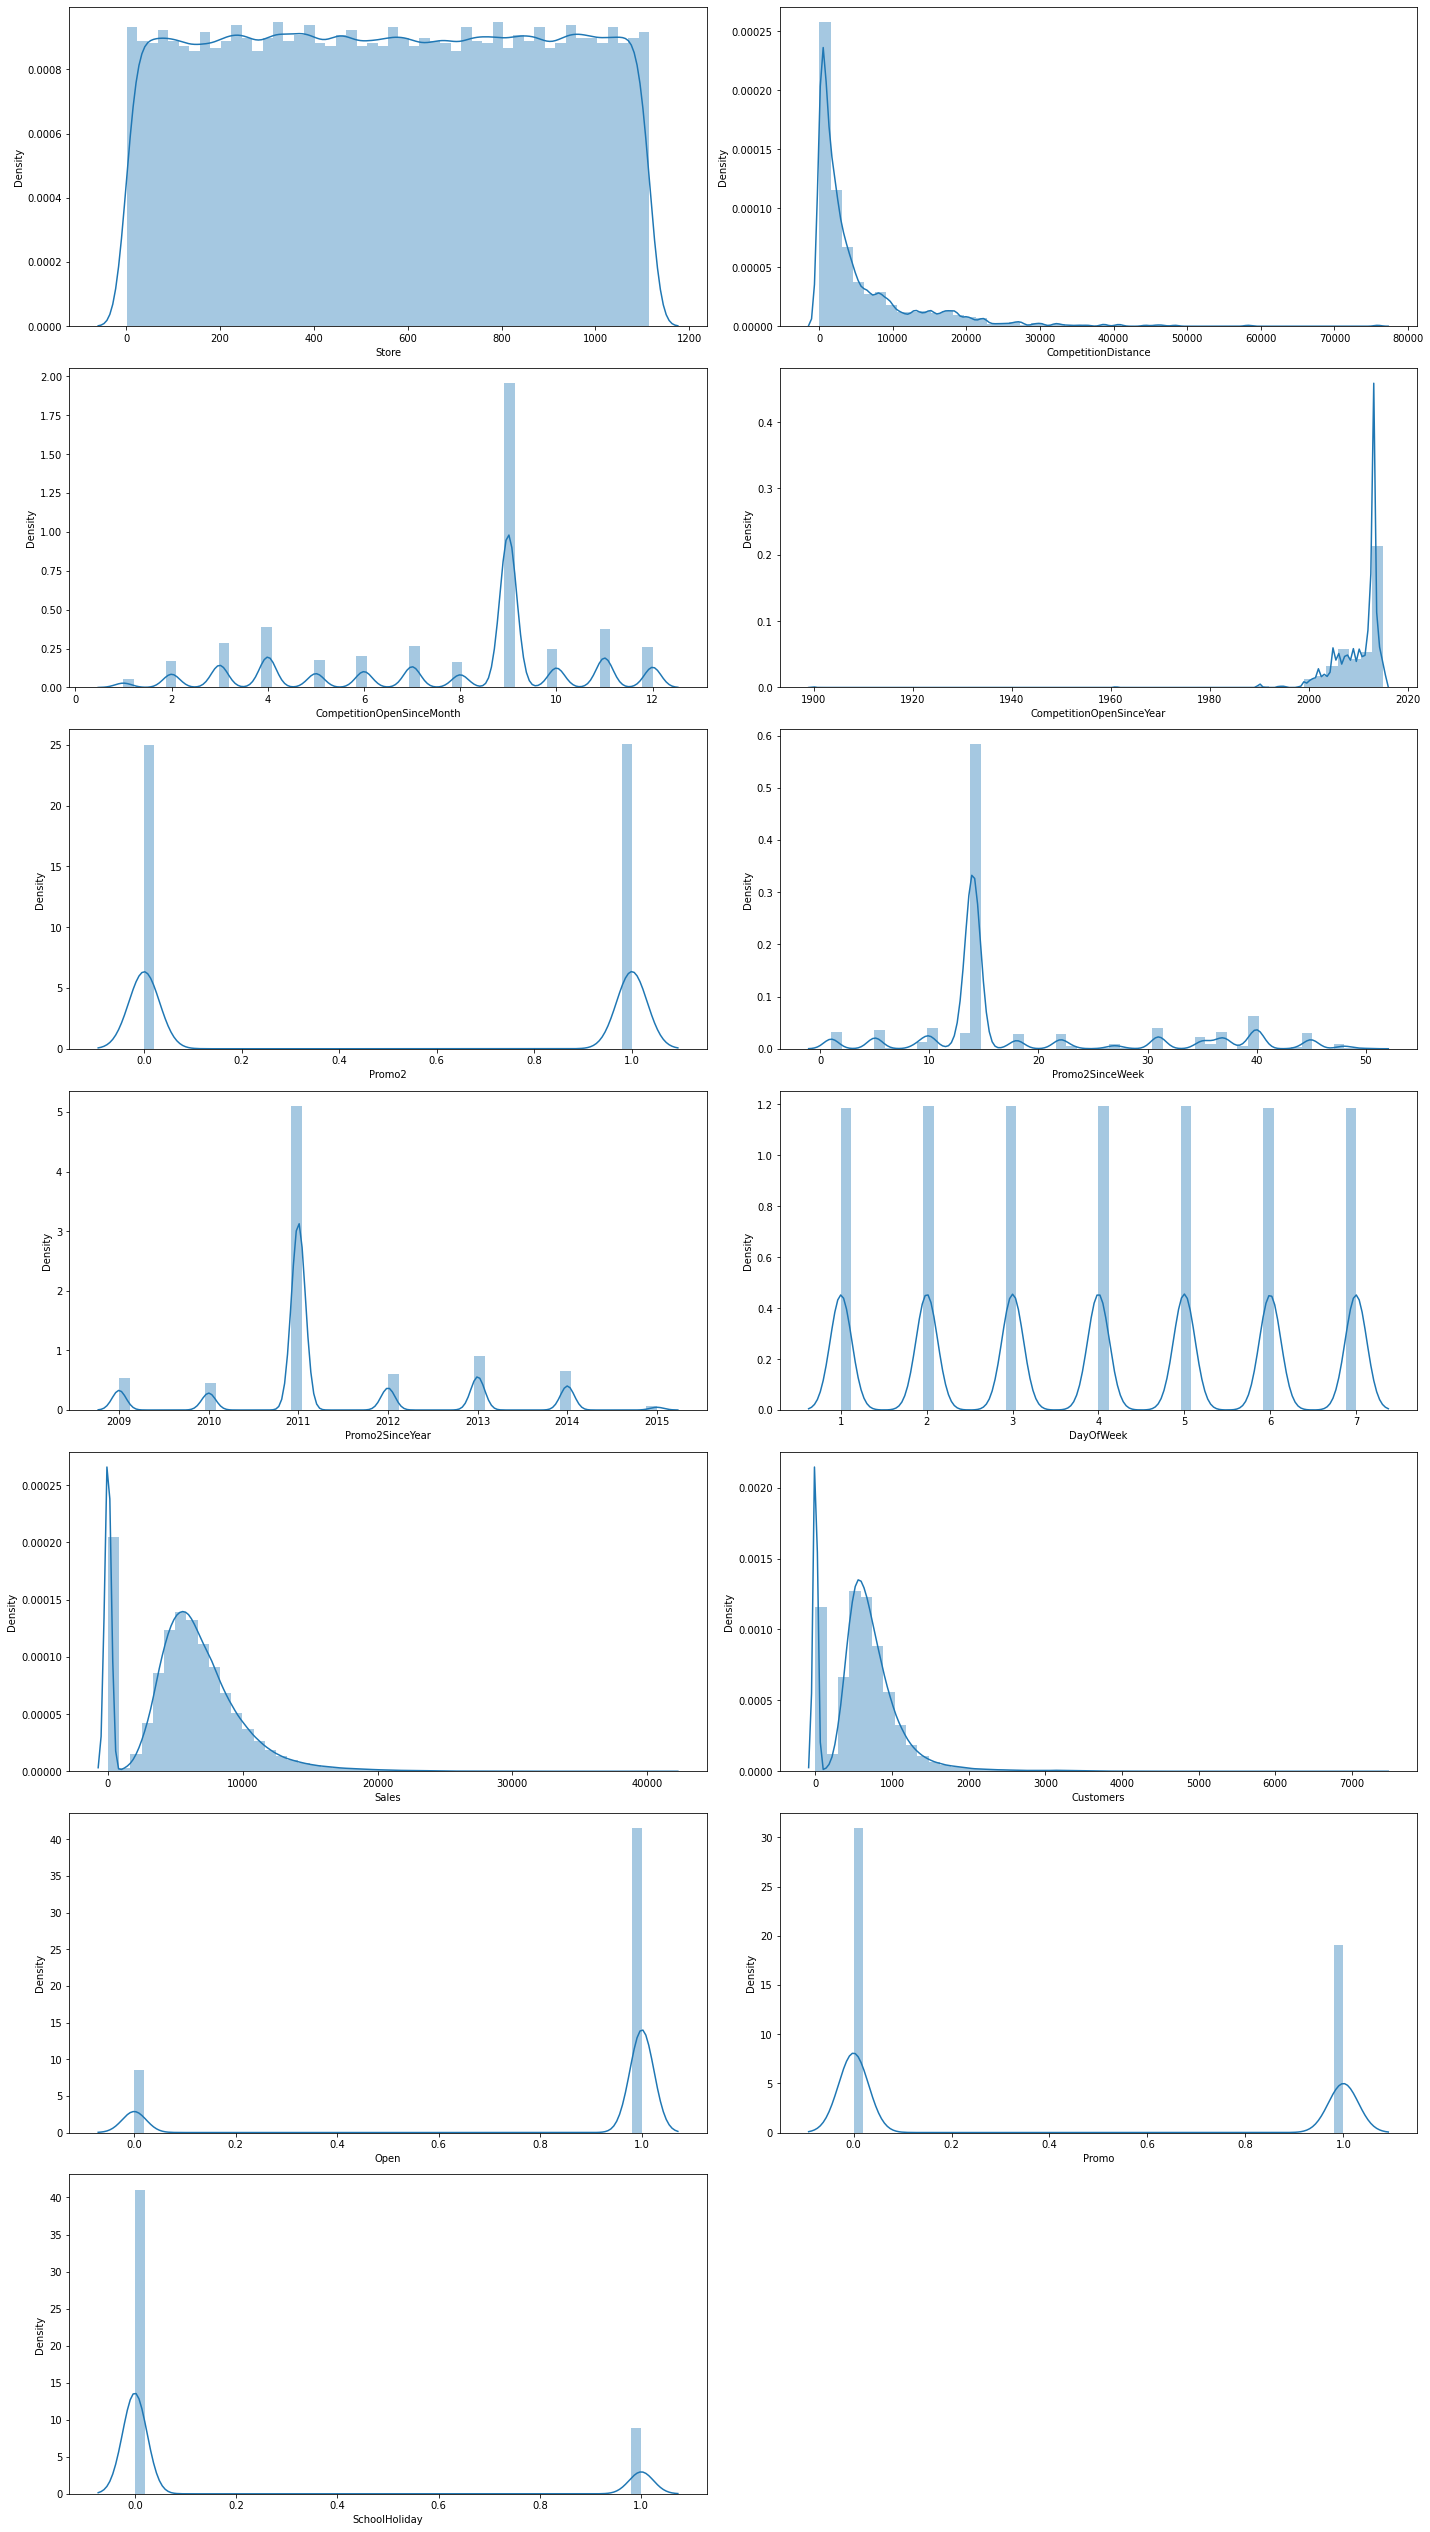

In [ ]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

plt.figure(figsize = (20, 80))
num = 1
for col in df_storeData.describe().columns:
    plt.subplot(16,2,num)
    sns.distplot(x=df_storeData[col])
    plt.xlabel(col) 
    num+=1

plt.tight_layout()

In [ ]:
print(df_storeData['StoreType'].value_counts())
print('--------------------')
print(df_storeData['Assortment'].value_counts())
print('--------------------')
print(df_storeData['PromoInterval'].value_counts())

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64
--------------------
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
--------------------
Jan,Apr,Jul,Oct     801153
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64


In [20]:
#Mapping everything to numerical values
df_storeData['StoreType']    = df_storeData['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
df_storeData['Assortment']   = df_storeData['Assortment'].map({'a':0, 'c':1,'b':2})
df_storeData['PromoInterval']= df_storeData['PromoInterval'].map({'Jan,Apr,Jul,Oct':0, 'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':2})
# df_storeData['StateHoliday'] = df_storeData['StateHoliday'].map({'0':0,'a':1,'b':1,'c':1})

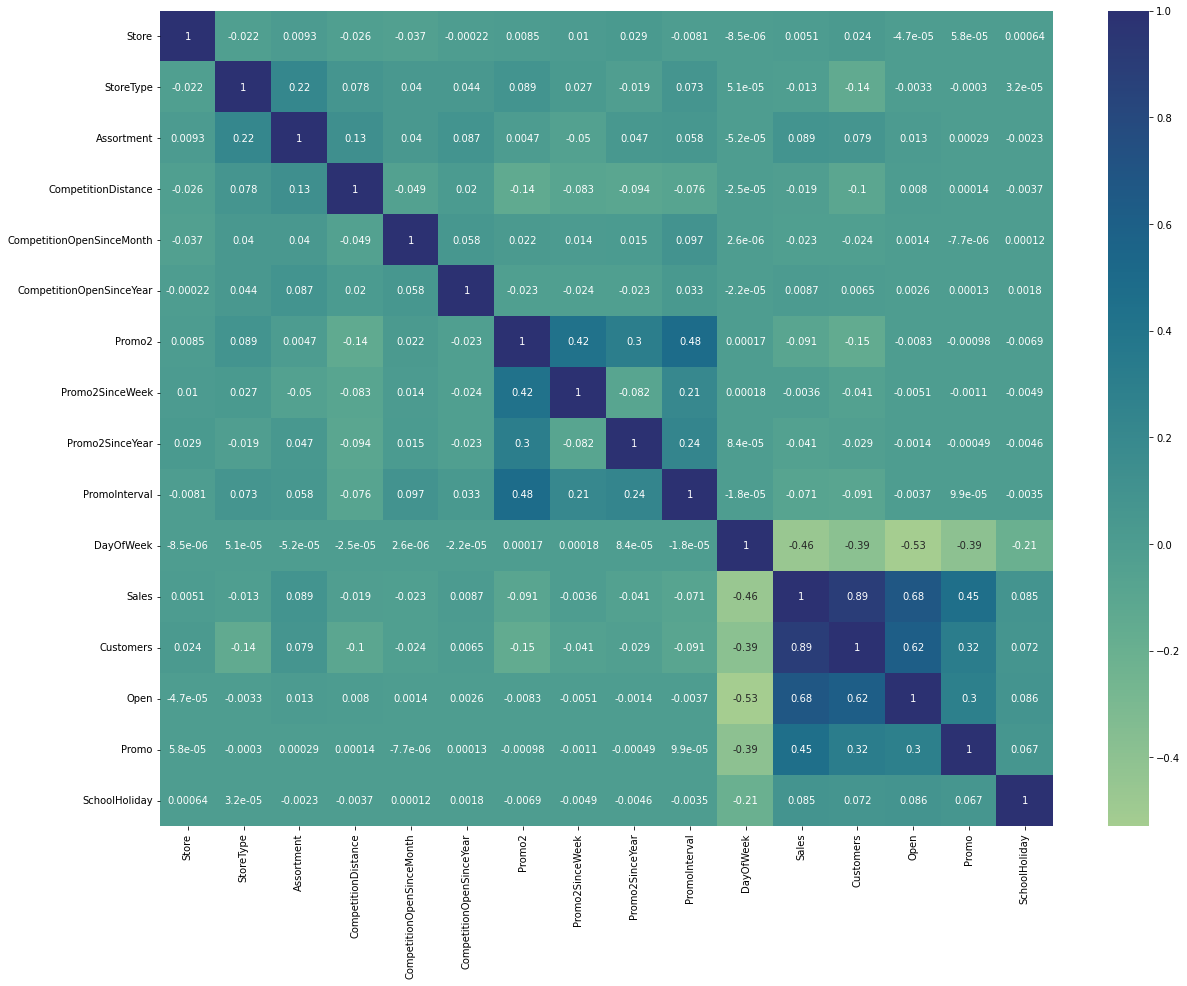

In [ ]:
plt.figure(figsize = (20, 15))
sns.heatmap(df_storeData.corr(),annot = True,cmap="crest")
plt.show()

##Observation:


*   Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation

*   State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
*  CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
*   There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2sinceweek and Promo2sinceyear are showing multicollinearity.
*  There's a positive correlation between customers and sales.







In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df_storeData[[i for i in df_storeData.describe().columns if i not in ['Promo2SinceYear','CompetitionOpenSinceYear','Sales','year','month','weekofyear','dayofyear']]])

,variables,VIF
0,Store,3.683348
1,StoreType,3.798023
2,Assortment,2.052927
3,CompetitionDistance,1.577750
4,CompetitionOpenSinceMonth,7.212854
5,Promo2,3.162611
6,Promo2SinceWeek,4.495791
7,PromoInterval,1.632826
8,DayOfWeek,4.607314
9,Customers,5.320537


In [ ]:
calc_vif(df_storeData[[i for i in df_storeData.describe().columns if i not in ['Sales','CompetitionOpenSinceYear','Promo2SinceYear','year','month','weekofyear','dayofyear']]])

,variables,VIF
0,Store,3.683348
1,StoreType,3.798023
2,Assortment,2.052927
3,CompetitionDistance,1.577750
4,CompetitionOpenSinceMonth,7.212854
5,Promo2,3.162611
6,Promo2SinceWeek,4.495791
7,PromoInterval,1.632826
8,DayOfWeek,4.607314
9,Customers,5.320537


In [21]:
numerical_features = ['Store','Assortment','CompetitionDistance','CompetitionOpenSinceMonth','Promo2','Promo2SinceWeek','PromoInterval','DayOfWeek','Customers','Open','Promo','SchoolHoliday']


In [22]:
categorical_features = df_storeData.describe(include=['object','category']).columns
categorical_features

Index(['StateHoliday'], dtype='object')

In [23]:

df_storeData = pd.get_dummies(df_storeData, columns=["StateHoliday"])
df_storeData.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [24]:
numerical_features = ['Store','Assortment','CompetitionDistance','CompetitionOpenSinceMonth','Promo2','Promo2SinceWeek','PromoInterval','DayOfWeek','Customers','Open','Promo','SchoolHoliday','StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c']

In [25]:
features = numerical_features.copy()

In [26]:
features

['Store',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c']

# MODEL TRAINING

In [27]:
X = df_storeData[features]

y =  df_storeData['Sales']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((813767, 16), (203442, 16), (813767,), (203442,))

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
reg = LinearRegression().fit(X_train,y_train)

In [ ]:
reg.score(X_train,y_train)

0.8586977146146012

In [ ]:
reg.coef_

array([ -48.60991275,   92.72770657,  220.57354344,  -11.89406295,
        108.53242372,  102.02164186,  -72.18858878, -151.18301846,
       2862.95809036,  527.94462111,  619.10548435,   26.71515592,
         68.60190583,  -56.09026088,  -52.87115125,    4.91305572])

In [ ]:
reg.intercept_

5772.659177627012

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([ 8237.12462514,  8082.21110961, 10497.44879446, ...,
        5602.2940407 ,  4358.10340024,  4906.02358164])

In [ ]:
MSE = mean_squared_error(y_test,y_pred)
print('MSE : ', MSE)

RMSE = np.sqrt(MSE)
print('RMSE : ', RMSE)

r2 = r2_score(y_test,y_pred)
print('r2 : ',r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE :  2111781.473259194
RMSE :  1453.196983639587
r2 :  0.8575783722366446
Adjusted R2 :  0.857567170338922


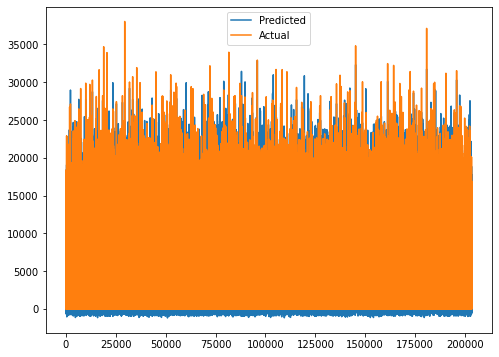

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# using Lasso regression model
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.8586977146145915

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.808e+11, tolerance: 9.637e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.836e+11, tolerance: 9.658e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
# ### Cross validation
# from sklearn.model_selection import GridSearchCV
# lasso = Lasso()
# parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
# lasso_regressor = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv = 5)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -2094276.726220172


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test,y_pred_lasso)
print('MSE : ', MSE)

RMSE = np.sqrt(MSE)
print('RMSE : ', RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print('r2 : ',r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE :  2111781.473259194
RMSE :  1453.196983639587
r2 :  0.8575783722366446
Adjusted R2 :  0.857567170338922


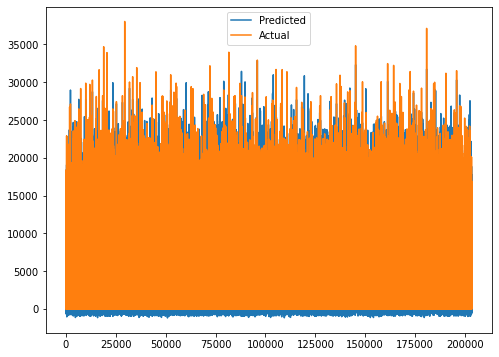

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error', cv = 3)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.37968e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.37968e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_estimator_)
print(ridge_regressor.best_score_)

Ridge(alpha=10)
-2094265.9251836555


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test,y_pred_ridge)
print('MSE : ', MSE)

RMSE = np.sqrt(MSE)
print('RMSE : ', RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print('r2 : ',r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE :  2111780.826412423
RMSE :  1453.196761079663
r2 :  0.8575784158609359
Adjusted R2 :  0.8575672139666445


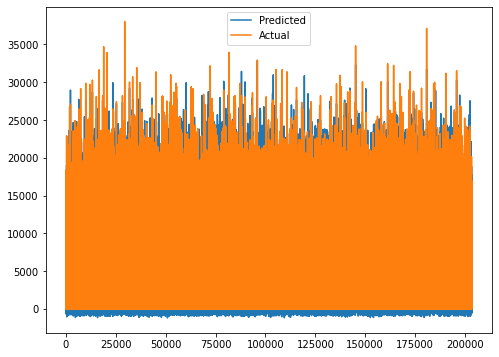

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [32]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [33]:
elasticnet.score(X_train,y_train)

0.8569986136120193

In [34]:
y_pred_en = elasticnet.predict(X_test)

In [35]:
MSE = mean_squared_error(y_test,y_pred_en)
print('MSE : ', MSE)

RMSE = np.sqrt(MSE)
print('RMSE : ', RMSE)

r2 = r2_score(y_test,y_pred_en)
print('r2 : ',r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE :  2134656.6675084555
RMSE :  1461.0464289366219
r2 :  0.8560356357169636
Adjusted R2 :  0.8560243124782834


In [37]:
elasticnet = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100] , 'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elasticnet_regressor = GridSearchCV(elasticnet,parameters,scoring = 'neg_mean_squared_error', cv = 3)
elasticnet_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.681e+11, tolerance: 8.032e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.679e+11, tolerance: 8.060e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [38]:
print(elasticnet_regressor.best_params_)
print(elasticnet_regressor.best_score_)

{'alpha': 0.0001, 'l1_ratio': 0.7}
-2094265.9249725658


In [39]:
y_pred_elastic = elasticnet_regressor.predict(X_test)

In [40]:
MSE = mean_squared_error(y_test,y_pred_elastic)
print('MSE : ', MSE)

RMSE = np.sqrt(MSE)
print('RMSE : ', RMSE)

r2 = r2_score(y_test,y_pred_elastic)
print('r2 : ',r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE :  2111779.8961833734
RMSE :  1453.1964410166208
r2 :  0.857578478596942
Adjusted R2 :  0.857567276707585


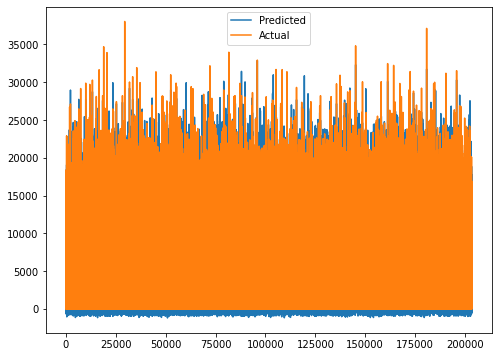

In [41]:
plt.figure(figsize=(8,6))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

#DataSet for classification model

By using train_test_split we have split the data into traing dataset and testing datasets of Decision Tree

By using train_test_split we have split the data into traing dataset and testing datasets of Decision Tree

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

Fit on Train Set

In [43]:
decision_tree_reg = DecisionTreeRegressor(max_depth=5)
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [44]:
y_predicted_decision_tree_reg = decision_tree_reg.predict(X_test)

In [45]:
MSE = mean_squared_error(y_test,y_predicted_decision_tree_reg)
print('MSE : ', MSE)

RMSE = np.sqrt(MSE)
print('RMSE : ', RMSE)

r2 = r2_score(y_test,y_predicted_decision_tree_reg)
print('r2 : ',r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_predicted_decision_tree_reg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE :  1959176.8699479243
RMSE :  1399.7059941101647
r2 :  0.867636142319061
Adjusted R2 :  0.8676298329312755


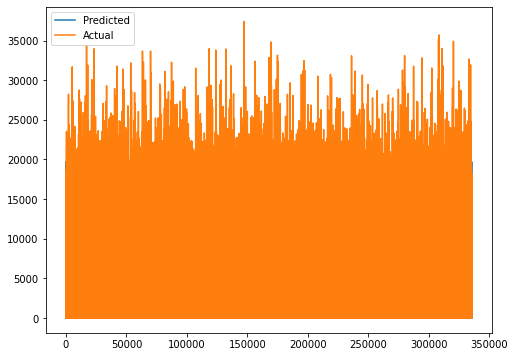

In [51]:
plt.figure(figsize=(8,6))
plt.plot(y_predicted_decision_tree_reg)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

##Random Forest

In [47]:
random_forest_reg = RandomForestRegressor(n_estimators = 500, max_depth = 5)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=500)

In [48]:
y_predicted_random_forest_reg = random_forest_reg.predict(X_test)

In [49]:
MSE = mean_squared_error(y_test,y_predicted_random_forest_reg)
print('MSE : ', MSE)

RMSE = np.sqrt(MSE)
print('RMSE : ', RMSE)

r2 = r2_score(y_test,y_predicted_random_forest_reg)
print('r2 : ',r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_predicted_random_forest_reg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE :  1877720.583842246
RMSE :  1370.2994504276232
r2 :  0.8731394066882431
Adjusted R2 :  0.8731333596245511


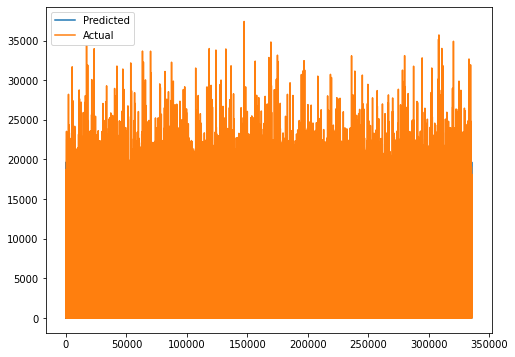

In [50]:
plt.figure(figsize=(8,6))
plt.plot(y_predicted_random_forest_reg)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

#Hyperparameter tuning

In [ ]:
# Hyperparameter tuning

# random_forest_reg_tuned = RandomForestRegressor() 
# grid_values = {'n_estimators':[400, 450,  550], 'max_depth':[4, 6, 7]}
# random_forest_reg_tuned = GridSearchCV(random_forest_reg_tuned, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5)

# # Fit the object to train dataset
# random_forest_reg_tuned.fit(X_train, y_train)